In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg
%matplotlib inline

def show_gradient_descent(A, b):
#  enter your code here, and remove the following line (30%)
   x = np.array([[-2], [2]])  # initial condition
   alpha = 0.02   # learning rate
   max_iter = 1000
   # define the gradient of the objective function
   f = np.dot(np.array(np.dot(A, x) - b).T, np.array(np.dot(A, x) - b))
   print('k', '(x1, x2)', 'f', sep='\t')
   for k in range(max_iter):
      print('%d\t(%.4f, %.4f)\t%.8f' % (k, x[0,0], x[1,0], f))
      x_prev = x
      delta_f = 2 * np.array(np.dot(A.T, np.dot(A, x)) - np.dot(A.T, b))
      x = x_prev - alpha * delta_f
      if np.linalg.norm(x-x_prev) <= 1e-8:
         break
      f = np.dot(np.array(np.dot(A, x) - b).T, np.array(np.dot(A, x) - b))
   pass

In [119]:
def draw_gradient_descent(A, b):
  xx, yy = np.meshgrid(np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1))
  F1 = A[0][0] * xx + A[0][1] * yy - b[0]
  F2 = A[1][0] * xx + A[1][1] * yy - b[1]
  zz = F1 * F1 + F2 * F2
  fig = plt.figure()
  ax = fig.add_axes(Axes3D(fig))
  ax.plot_surface(xx, yy, zz, alpha=0.7, cmap=cm.coolwarm)

  # Plot the red points for each iteration
  x = np.array([[-2], [2]])  # initial condition
  alpha = 0.02  # learning rate
  max_iter = 1000
  f = np.dot(np.array(np.dot(A, x) - b).T, np.array(np.dot(A, x) - b))
  for k in range(max_iter):
    ax.scatter(x[0, 0], x[1, 0], f, color='r')  # plot the current point
    x_prev = x
    delta_f = 2 * np.array(np.dot(A.T, np.dot(A, x)) - np.dot(A.T, b))
    x = x_prev - alpha * delta_f
    if np.linalg.norm(x - x_prev) <= 1e-8:
      break
    f = np.dot(np.array(np.dot(A, x) - b).T, np.array(np.dot(A, x) - b))

  # optimal solution can be found by solving the linear equation
  # A^TAx = A^Tb 's solution is 2x - 4y = 3
  # Draw the blue line for the equation 2x - 4y = 3 passing through the point (-0.5, -1)
  direction = (2, 1)
  x_optimal = [-0.5]
  y_optimal = [-1]
  for i in range(2):
    # move 1 unit in the direction
    x_optimal.append(x_optimal[0] + (i+1) * direction[0])
    y_optimal.append(y_optimal[0] + (i+1) * direction[1])
    # move 1 unit in the opposite direction
    x_optimal.append(x_optimal[0] - (i+1) * direction[0])
    y_optimal.append(y_optimal[0] - (i+1) * direction[1])

  ax.plot(x_optimal, y_optimal, np.zeros(len(x_optimal)), color='b')

  plt.show()

k	(x1, x2)	f
0	(-2.0000, 2.0000)	113.00000000
1	(-1.4000, 0.8000)	41.00000000
2	(-1.0400, 0.0800)	15.08000000
3	(-0.8240, -0.3520)	5.74880000
4	(-0.6944, -0.6112)	2.38956800
5	(-0.6166, -0.7667)	1.18024448
6	(-0.5700, -0.8600)	0.74488801
7	(-0.5420, -0.9160)	0.58815968
8	(-0.5252, -0.9496)	0.53173749
9	(-0.5151, -0.9698)	0.51142550
10	(-0.5091, -0.9819)	0.50411318
11	(-0.5054, -0.9891)	0.50148074
12	(-0.5033, -0.9935)	0.50053307
13	(-0.5020, -0.9961)	0.50019190
14	(-0.5012, -0.9976)	0.50006909
15	(-0.5007, -0.9986)	0.50002487
16	(-0.5004, -0.9992)	0.50000895
17	(-0.5003, -0.9995)	0.50000322
18	(-0.5002, -0.9997)	0.50000116
19	(-0.5001, -0.9998)	0.50000042
20	(-0.5001, -0.9999)	0.50000015
21	(-0.5000, -0.9999)	0.50000005
22	(-0.5000, -1.0000)	0.50000002
23	(-0.5000, -1.0000)	0.50000001
24	(-0.5000, -1.0000)	0.50000000
25	(-0.5000, -1.0000)	0.50000000
26	(-0.5000, -1.0000)	0.50000000
27	(-0.5000, -1.0000)	0.50000000
28	(-0.5000, -1.0000)	0.50000000
29	(-0.5000, -1.0000)	0.50000000
30	(-0

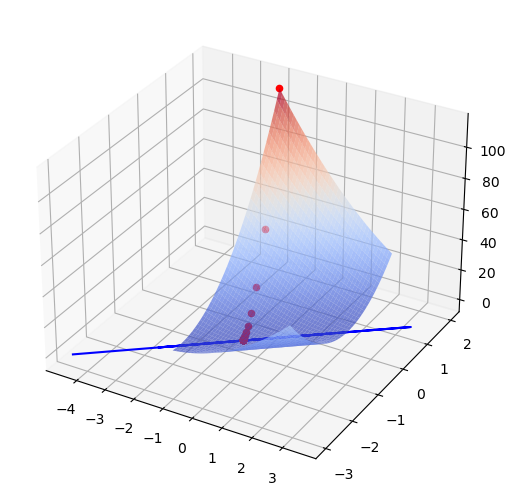

In [120]:
if __name__ == '__main__':
  b = np.array([[1], [2]])
  A = np.array([[1, -2], [1, -2]])
  show_gradient_descent(A, b)
  draw_gradient_descent(A, b)

In [121]:
# Try different learning rates of alpha. How to adjust the learning rate for faster speed of convergence? (4%)
# 如何調整 alpha 使得所需迴圈次數愈少愈好(即較快達到收斂)？
# Write down your answer here. 

# Answer:
# 調高 alpha 可以使得所需迴圈次數愈少愈好(即較快達到收斂)。
# 但是 alpha 太高反而導致無法收斂 (無法接近最低點)，因此需要適當的調整 alpha。

In [122]:
# Try different initial points of x. Do different initial points give rise to different to optimal solutions? (4%)
# 不同初始點 x 會使演算法找到不同最佳解嗎?
# Write down your answer here.

# Answer:
# EX1: x = np.array([[5], [-3]])
# 38	(3.1000, 0.8000)	0.50000000
# EX2: x = np.array([[-10], [12]])
# 40	(-2.9000, -2.2000)	0.50000000
# 根據測試結果發現，不同的起始點會得到不同的最佳解。

In [123]:
# Does the minimum vary with the values of the initial point? (4%)
# 不同初始點 x 會使演算法找到不同最小值嗎?
# Write down your answer here. 

# Answer:
# 不同的起始點會得到不同的最佳解，但是最小值是一樣的。 (看上題的範例)

In [124]:
# Is the minimum a local minimum or a global minimum? (4%)
# # Write down your answer here. 

# Answer:
# least squares problem is convex, so the minimum is a global minimum.
# ref: the optimization ppt provided by the instructor